# Boosted Decision Tree Classifier

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import mltools.linear
import mltools.transforms as xform

np.random.seed(0)
%matplotlib inline

In [6]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

In [3]:
X.shape

(200000, 14)

In [4]:
Y.shape

(200000,)

In [7]:
# Xs, Ys = X[:2000], Y[:2000]
# Xtr, Xva, Ytr, Yva = ml.splitData(Xs,Ys, .75)
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y, .75)

In [58]:
boosts = []
n_boosts = 100

Ytr_ = np.copy(Ytr)  # We're going to copy the data into a new variable.

for i in range(n_boosts):
    tree = ml.dtree.treeRegress(Xtr, Ytr_, maxDepth=1)
    boosts.append(tree)
    # Now "learning" from our mistakes.
    Ytr_ -= tree.predict(Xtr)

In [59]:
class BoostedTree(ml.base.classifier):
    def __init__(self, learners):
        self.learners = learners
    
    def predict(self, X):
        preds = [self.learners[l].predict(X) for l in range(len(self.learners))]
        return np.sum(preds, axis=0)

In [63]:
train_auc = np.zeros((99))
validation_auc = np.zeros((99))
for i in range(0,99):
    bt = BoostedTree(boosts[:i+1])
    bt.classes = np.unique(Y)
    train_auc[i] = bt.auc(Xtr, Ytr)
    validation_auc[i] = bt.auc(Xva, Yva)

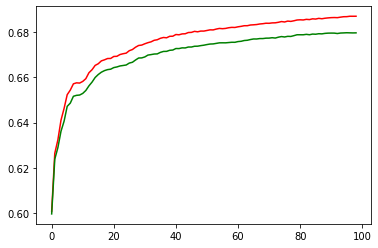

In [64]:
plt.plot(train_auc,'r-',validation_auc,'g-')
plt.show()

In [65]:
print(validation_auc[-5])
print(validation_auc[-1])

0.6796103320494208
0.6796342661892174


In [ ]:
# Create the data for submission by taking the P(Y=1) column from probs and just add a running index as the first column.
Y_sub = np.vstack([np.arange(Xte.shape[0]), probs[:, 1]]).T

# We specify the header (ID, Prob1) and also specify the comments as '' so the header won't be commented out with
# the # sign.
np.savetxt('data/Y_sub.txt', Y_sub, '%d, %.5f', header='ID,Prob1', comments='', delimiter=',')

In [65]:
boosts = []
n_boosts = 20

Ytr_ = np.copy(Ytr)  # We're going to copy the data into a new variable.

for i in range(n_boosts):
    tree = ml.dtree.treeClassify(Xtr, Ytr_, maxDepth=1)
    boosts.append(tree)
    # Now "learning" from our mistakes.
    Ytr_ -= tree.predictSoft(Xtr)[:,1]

In [66]:
class BoostedTree(ml.base.classifier):
    def __init__(self, learners):
        self.learners = learners
    
    def predictSoft(self, X):
        preds = [self.learners[l].predictSoft(X) for l in range(len(self.learners))]
        return np.sum(preds, axis=0)

In [68]:
train_auc = np.zeros((19))
validation_auc = np.zeros((19))
for i in range(1,19):
    bt = BoostedTree(boosts[1:i+1])
    bt.classes = np.unique(Y)
    train_auc[i] = bt.auc(Xtr, Ytr)
    validation_auc[i] = bt.auc(Xva, Yva)

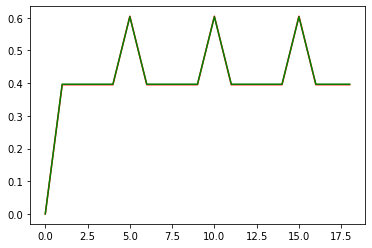

In [69]:
plt.plot(train_auc,'r-',validation_auc,'g-')
plt.show()

## Adaboost for Single-Depth Decision Tree
This is run in multiple iterations with additional boosts each time to create AUC graph

In [2]:
## TEST

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# train_auc = np.zeros((15))
# validation_auc = np.zeros((15))
# for i in range(15):
#     bgc = GradientBoostingClassifier(n_estimators=i, max_depth=1)
#     bgc.fit(Xtr, Ytr)

In [11]:
dtree_clf = DecisionTreeClassifier(max_depth=1)

train_auc = np.zeros((20))
validation_auc = np.zeros((20))

for i,n in enumerate(range(0,100,5)):
    if n%5 == 0: print(f'{n+1} boosts...')
    ada_regr = AdaBoostClassifier(base_estimator=dtree_clf, n_estimators=n+1)
    ada_regr.fit(Xtr, Ytr)
    train_auc[i] = ada_regr.score(Xtr, Ytr)
    validation_auc[i] = ada_regr.score(Xva, Yva)
#     preds = ada_regr.predict_proba(Xva)

1 boosts...
6 boosts...
11 boosts...
16 boosts...
21 boosts...
26 boosts...
31 boosts...
36 boosts...
41 boosts...
46 boosts...
51 boosts...
56 boosts...
61 boosts...
66 boosts...
71 boosts...
76 boosts...
81 boosts...
86 boosts...
91 boosts...
96 boosts...


In [21]:
train_auc = np.concatenate((train_auc, np.zeros(6)))
validation_auc = np.concatenate((validation_auc, np.zeros(6)))

for i,n in enumerate(range(100,126,5)):
    if n%5 == 0: print(f'{n+1} boosts...')
    ada_regr = AdaBoostClassifier(base_estimator=dtree_clf, n_estimators=n+1)
    ada_regr.fit(Xtr, Ytr)
    train_auc[i+20] = ada_regr.score(Xtr, Ytr)
    validation_auc[i+20] = ada_regr.score(Xva, Yva)

101 boosts...
106 boosts...
111 boosts...
116 boosts...
121 boosts...
126 boosts...


In [25]:
train_auc = np.concatenate((train_auc, np.zeros(6)))
validation_auc = np.concatenate((validation_auc, np.zeros(6)))

for i,n in enumerate(range(130,156,5)):
    if n%5 == 0: print(f'{n+1} boosts...')
    ada_regr = AdaBoostClassifier(base_estimator=dtree_clf, n_estimators=n+1)
    ada_regr.fit(Xtr, Ytr)
    train_auc[i+26] = ada_regr.score(Xtr, Ytr)
    validation_auc[i+26] = ada_regr.score(Xva, Yva)

131 boosts...
136 boosts...
141 boosts...
146 boosts...
151 boosts...
156 boosts...


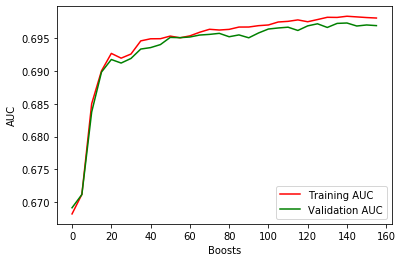

In [27]:
xrange = np.arange(0,156,5)
plt.plot(xrange,train_auc,'r-',xrange,validation_auc,'g-')
plt.xlabel('Boosts')
plt.ylabel('AUC')
plt.legend(['Training AUC', 'Validation AUC'])
plt.savefig('adaboost_auc155.png')
plt.show()

## Training and Boosting with All Available Data for Submission

In [ ]:
dtree_clf = DecisionTreeClassifier(max_depth=1)
ada_regr = AdaBoostClassifier(base_estimator=dtree_clf, n_estimators=140)
ada_regr.fit(X, Y)
preds = ada_regr.predict_proba(Xte)

In [ ]:
# Create the data for submission by taking the P(Y=1) column from probs and just add a running index as the first column.
Y_sub = np.vstack([np.arange(Xte.shape[0]), probs[:, 1]]).T

# We specify the header (ID, Prob1) and also specify the comments as '' so the header won't be commented out with
# the # sign.
np.savetxt('data/Y_sub.txt', Y_sub, '%d, %.5f', header='ID,Prob1', comments='', delimiter=',')

## Run 2 with Adaboost Regressor on Decision Tree
Decision tree is changed to have max depth 3 instead of 1

In [46]:
# dtree_clf2 = DecisionTreeClassifier(max_depth=3)

# train_auc2 = np.zeros((20))
# validation_auc2 = np.zeros((20))

for i,n in enumerate(range(0,101,5)):
    if n%5 == 0: print(f'{n+1} boosts...')
#     ada_regr2 = AdaBoostClassifier(base_estimator=dtree_clf2, n_estimators=n+1)
#     ada_regr2.fit(Xtr, Ytr)
#     train_auc2[i] = ada_regr2.score(Xtr, Ytr)
#     validation_auc2[i] = ada_regr2.score(Xva, Yva)
#     preds = ada_regr.predict_proba(Xva)

In [ ]:
train_auc2 = np.concatenate((train_auc2, np.zeros(5)))
validation_auc2 = np.concatenate((validation_auc2, np.zeros(5)))

for i,n in enumerate(range(105,126,5)):
    if n%5 == 0: print(f'{n+1} boosts...')
    ada_regr2 = AdaBoostClassifier(base_estimator=dtree_clf2, n_estimators=n+1)
    ada_regr2.fit(Xtr, Ytr)
    train_auc2[i+21] = ada_regr2.score(Xtr, Ytr)
    validation_auc2[i+21] = ada_regr2.score(Xva, Yva)

106 boosts...
111 boosts...
116 boosts...
121 boosts...


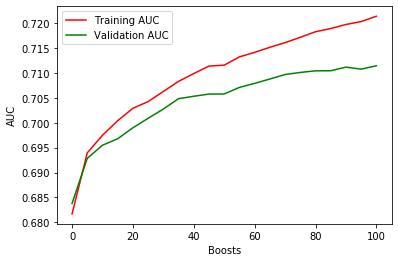

In [45]:
xrange = np.arange(0,126,5)
plt.plot(xrange,train_auc2,'r-',xrange,validation_auc2,'g-')
plt.xlabel('Boosts')
plt.ylabel('AUC')
plt.legend(['Training AUC', 'Validation AUC'])
plt.savefig('adaboost2_auc126.png')
plt.show()